After we have proved that the tools created here work. In this jupyter notebook I will reach fine each model. Comparing the resultant loss in each better ./ 

Starting with the Model 1 : Simple BaseLine Model

In [1]:
import sys
import os

project_root = os.path.abspath('../../')  

if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [ ]:
from Code.engine.MLP import SimpleBaseLine
from Code.engine.mlp_trainer import  run_optuna_search,train_and_save_results


search_space_for_MLP = {
    'lr': (1e-4, 1e-2),                # range for learning rate
    'l2_lambda': (1e-5, 1e-2),        # range for L2 regularization
    'input_size': [8,16,32],             # integer range for input window size
    'hidden_size': [64, 128, 256],          # integer range for hidden layer size
    'batch_size': [16, 32, 64],        # categorical batch sizes to try
    'alpha': (0.1, 1.0)                # range for alpha hyperparameter
}


best_params_SimpleBaseLine_Step_One = run_optuna_search(MLP_model_class =SimpleBaseLine, n_trials=50, folder_name="SimpleBaseLine_MLP_Range_1", search_space=search_space_for_MLP)

In [2]:
from Code.engine.mlp_trainer import  train_and_save_results
from Code.engine.MLP import SimpleBaseLine

#best_parameter_found_Simple_base_line
best = {
    'lr': 0.001179495825433003,                
    'l2_lambda':  0.007915993119583187,       
    'input_size': 8,             
    'hidden_size': 128,          
    'batch_size': 16,        
    'alpha': 0.27638620409092013               
}

#This hyperparameter has testing error of : 0.18520157335842669

train_and_save_results(MLP_model_class = SimpleBaseLine,hidden_size= best['hidden_size'], input_size = best['input_size'],l2_lambda= best['l2_lambda']
                       , batch_size = best['batch_size'], lr=best['lr'], alpha = best['alpha'], folder_name= "Best_Simple_Baseline_Model")

c:\Users\Abbass Zahreddine\Documents\GitHub\Clean_Bot_Version_1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TypeError: feature_1_normalize() got an unexpected keyword argument 'scaler_1'

Just to Make Easier. We already know that the best hyperparameter we have seen for the SimpleBaseline Model is 
{'lr': 0.001179495825433003, 'l2_lambda': 0.007915993119583187, 'input_size': 8, 'hidden_size': 128, 'batch_size': 16, 'alpha': 0.27638620409092013}

Now with the Second MLP Model here ; The PyramidStyle

In [ ]:
from Code.engine.mlp_trainer import  run_optuna_search
from Code.engine.MLP import PyramidStyle


search_space_for_MLP = {
    'lr': (0.0005, 0.002),         # Narrower learning rate range
    'l2_lambda': (0.0005, 0.005),  # Focused L2 regularization range
    'input_size': (7, 10),         # Smaller window size range
    'hidden_size': [64, 128],     # Tighter hidden layer size range
    'batch_size': [16, 32],        # Fewer batch sizes for faster tuning
    'alpha': (0.25, 0.35)          # Narrow range around previously good value (0.276)
}

best_params_PyramidStyle_Step_One = run_optuna_search(MLP_model_class=PyramidStyle, n_trials=30, folder_name="PyramidStyle_MLP_Range_1", search_space=search_space_for_MLP)


c:\Users\Abbass Zahreddine\Documents\GitHub\Clean_Bot_Version_1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Evaluating 
Evaluating 
We The people want the PLOT


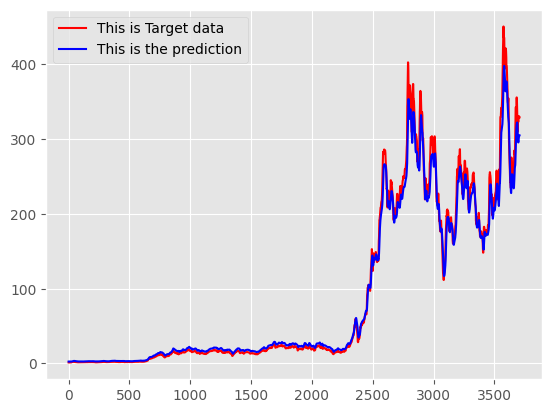

Training complete. Plots saved in folder: Best_Pyramid_Style_Model
The Testing Loss for this model over the testing data is : 0.18520157335842669


PyramidStyle(
  (module): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [ ]:
from Code.engine.mlp_trainer import  train_and_save_results
from Code.engine.MLP import PyramidStyle

#best_parameter_found_Simple_base_line
best = {
    'lr': 0.001179495825433003,                
    'l2_lambda':  0.007915993119583187,       
    'input_size': 8,             
    'hidden_size': 128,          
    'batch_size': 16,        
    'alpha': 0.27638620409092013               
}

#This hyperparameter has testing error of : 0.18520157335842669

train_and_save_results(MLP_model_class = PyramidStyle,hidden_size= best['hidden_size'], input_size = best['input_size'],l2_lambda= best['l2_lambda']
                       , batch_size = best['batch_size'], lr=best['lr'], alpha = best['alpha'], folder_name= "Best_Pyramid_Style_Model")

Now Testing the third MLP Third Model WideShallow

In [ ]:
from Code.engine.mlp_trainer import  run_optuna_search
from Code.engine.MLP import WideShallow


search_space_for_MLP = {
    'lr': (0.0005, 0.002),         # Narrower learning rate range
    'l2_lambda': (0.0005, 0.005),  # Focused L2 regularization range
    'input_size': (7, 10),         # Smaller window size range
    'hidden_size': [64, 128],     # Tighter hidden layer size range
    'batch_size': [16, 32],        # Fewer batch sizes for faster tuning
    'alpha': (0.25, 0.35)          # Narrow range around previously good value (0.276)
}

best_params_PyramidStyle_Step_One = run_optuna_search(MLP_model_class=WideShallow, n_trials=30, folder_name="WideShallow_MLP_Range_1", search_space=search_space_for_MLP)


Evaluating 
Evaluating 
We The people want the PLOT


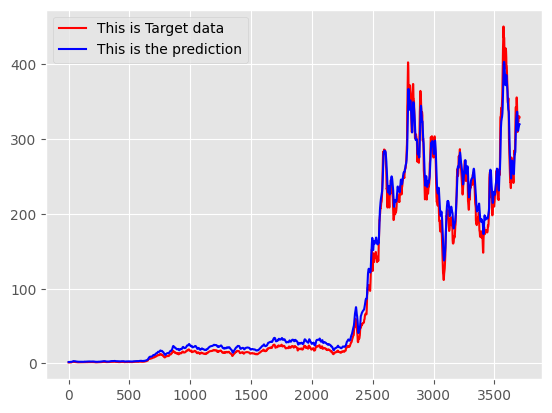

Training complete. Plots saved in folder: Best_Wide_Shallow_Model
The Testing Loss for this model over the testing data is : 0.15916057027789066


WideShallow(
  (module): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [ ]:
from Code.engine.mlp_trainer import  train_and_save_results
from Code.engine.MLP import WideShallow

best = {
    'lr': 0.001179495825433003,                
    'l2_lambda':  0.007915993119583187,       
    'input_size': 8,             
    'hidden_size': 128,          
    'batch_size': 16,        
    'alpha': 0.27638620409092013               
}

#This set of hyperparameter has error of : 0.15916057027789066

train_and_save_results(MLP_model_class = WideShallow,hidden_size= best['hidden_size'], input_size = best['input_size'],l2_lambda= best['l2_lambda']
                       , batch_size = best['batch_size'], lr=best['lr'], alpha = best['alpha'], folder_name= "Best_Wide_Shallow_Model")

Now Testing the Forth MLP Model RegularizedDeep

In [ ]:
from Code.engine.mlp_trainer import  run_optuna_search
from Code.engine.MLP import RegularizedDeep


search_space_for_MLP = {
    'lr': (0.0005, 0.002),         # Narrower learning rate range
    'l2_lambda': (0.0005, 0.005),  # Focused L2 regularization range
    'input_size': (7, 10),         # Smaller window size range
    'hidden_size': [64, 128],     # Tighter hidden layer size range
    'batch_size': [16, 32],        # Fewer batch sizes for faster tuning
    'alpha': (0.25, 0.35)          # Narrow range around previously good value (0.276)
}

best_params_PyramidStyle_Step_One = run_optuna_search(MLP_model_class=RegularizedDeep, n_trials=30, folder_name="RegularizedDeep_MLP_Range_1", search_space=search_space_for_MLP)

c:\Users\Abbass Zahreddine\Documents\GitHub\Clean_Bot_Version_1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We The people want the PLOT


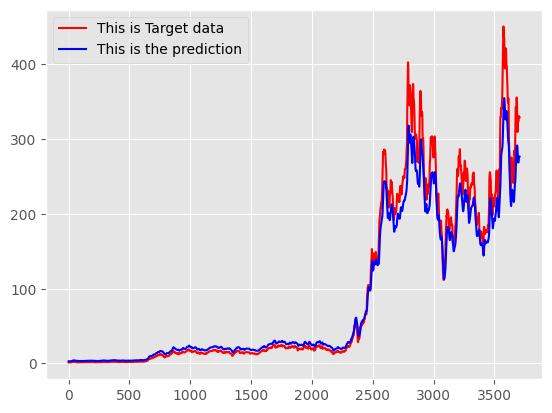

Training complete. Plots saved in folder: Best_Regularized_Deep_Model
The Testing Loss for this model over the testing data is : 0.24124373878294136


RegularizedDeep(
  (module): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=32, bias=True)
    (6): ReLU()
    (7): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [2]:
from Code.engine.mlp_trainer import  train_and_save_results
from Code.engine.MLP import RegularizedDeep

best = {
    'lr': 0.001179495825433003,                
    'l2_lambda':  0.007915993119583187,       
    'input_size': 8,             
    'hidden_size': 128,          
    'batch_size': 16,        
    'alpha': 0.27638620409092013               
}

#This set of hyperparameter has error of : 0.24124373878294136

train_and_save_results(MLP_model_class = RegularizedDeep,hidden_size= best['hidden_size'], input_size = best['input_size'],l2_lambda= best['l2_lambda']
                       , batch_size = best['batch_size'], lr=best['lr'], alpha = best['alpha'], folder_name= "Best_Regularized_Deep_Model")

Here I am testing an idea I have in mind. That is about calculating the error after denormalization or before it. In the scope of gaining a better alignment between visual matching of two graphs prediction and real datam, and the loss number. As I suspect that there is an error in the evaluation function itself. 

In [15]:
from torch import nn
import numpy as np
import torch


criterion = nn.MSELoss()

x_axis = np.arange(0,1001)
y_1 = x_axis**0.5
y_2 = x_axis**0.5 + 1

# Convert to torch tensors (float type)
y_1_tensor = torch.tensor(y_1, dtype=torch.float32)
y_2_tensor = torch.tensor(y_2, dtype=torch.float32)

loss = criterion(y_1_tensor, y_2_tensor)




print(f"The loss is {loss}")





The loss is 1.0
